In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [59]:
fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values
print(fare_values.shape)

(891,)


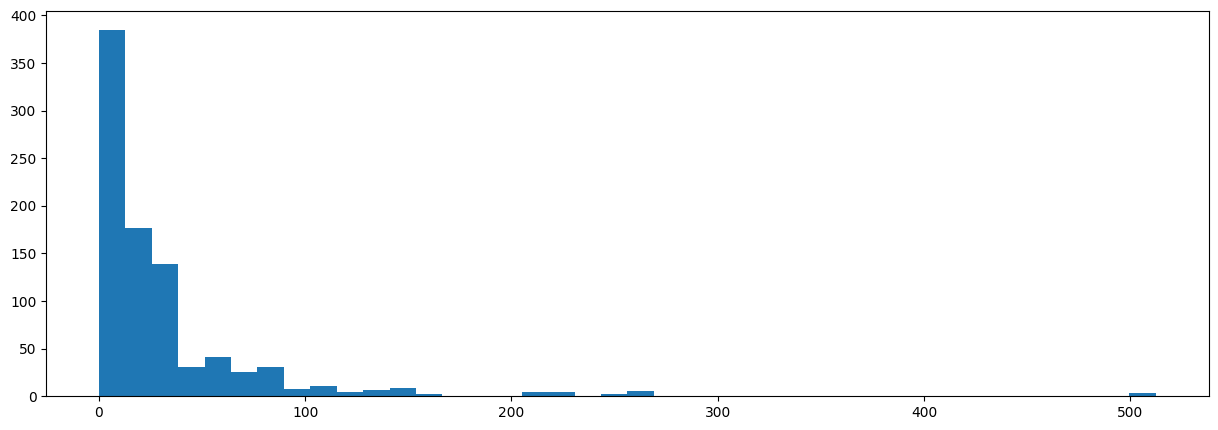

In [60]:
plt.figure(figsize=(15, 5))
plt.hist(fare_values, bins=40)
plt.show()

In [61]:
#Średnia, mediana i moda
mean_fare = np.round(np.mean(fare_values))
median_fare = np.median(fare_values)
mode_fare = stats.mode(fare_values)

In [62]:
#Kwartyle
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))

In [63]:
#Rozstęp międzykwartylowy - IQR
iqr = q3 - q1

In [64]:
#Zakres
range_fare = max(fare_values) - min(fare_values)

In [65]:
#Wariancja i odchylenie standardowe
variance_fare = np.var(fare_values, ddof=1)
standard_deviation_fare = np.std(fare_values, ddof=1)

In [66]:
#Wyświetlenie wyników
print(f'Srednia wynosi {mean_fare}')
print(f'Mediana wynosi {median_fare}')
print(mode_fare)
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')
print(f'Rozstęp międzykwartylowy wynosi {iqr}')
print(f'Zakres opłaty wynosi {range_fare}')
print(f'Wariancja wynosi {variance_fare}')
print(f'Odchylenie standardowe wynosi {standard_deviation_fare}')

Srednia wynosi 32.0
Mediana wynosi 14.4542
ModeResult(mode=np.float64(8.05), count=np.int64(43))
Q0: 0.0
Q1: 8.0
Q2: 14.4542
Q3: 31.0
Q4: 512.0
Rozstęp międzykwartylowy wynosi 23.0
Zakres opłaty wynosi 512.3292
Wariancja wynosi 2469.436845743116
Odchylenie standardowe wynosi 49.6934285971809


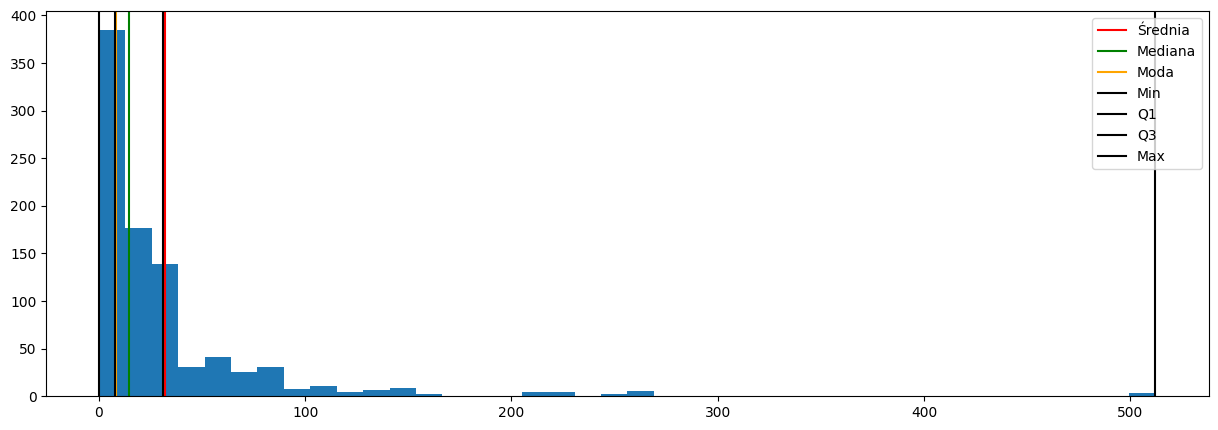

In [67]:
plt.figure(figsize=(15, 5))
plt.hist(fare_values, bins=40)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

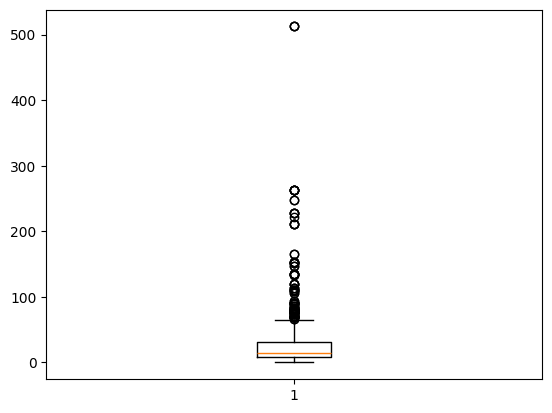

In [68]:
#Wykres pudełkowy
plt.boxplot(fare_values)
plt.show()

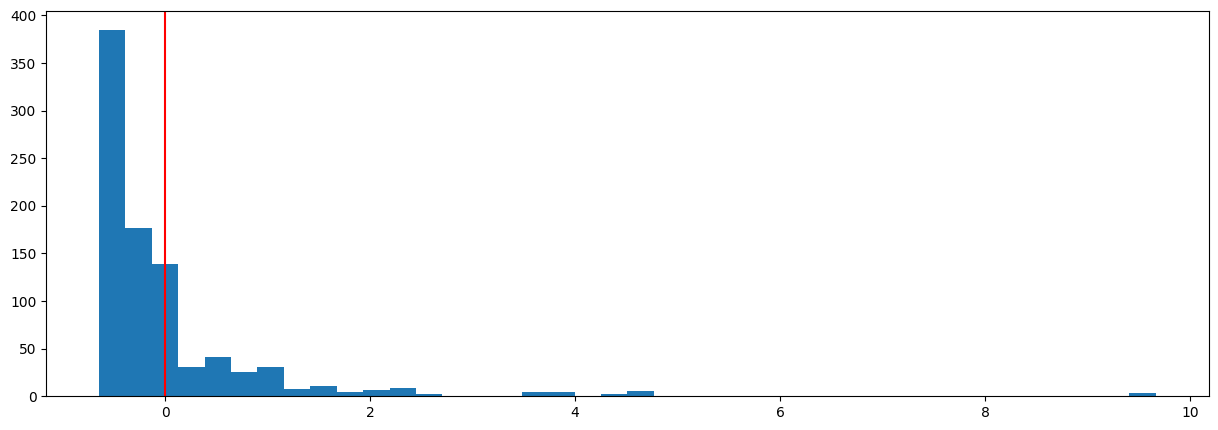

Średnia: 3.987332972840069e-18
Odchylenie standardowe: 1.0005616400330457


In [69]:
#Standaryzacja
scaler_standardized = StandardScaler()
standardized_fare_values = scaler_standardized.fit_transform(fare_values.reshape(-1, 1))
plt.figure(figsize=(15, 5))
plt.hist(standardized_fare_values, bins=40)
plt.axvline(x = standardized_fare_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {standardized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(standardized_fare_values, ddof=1)}')

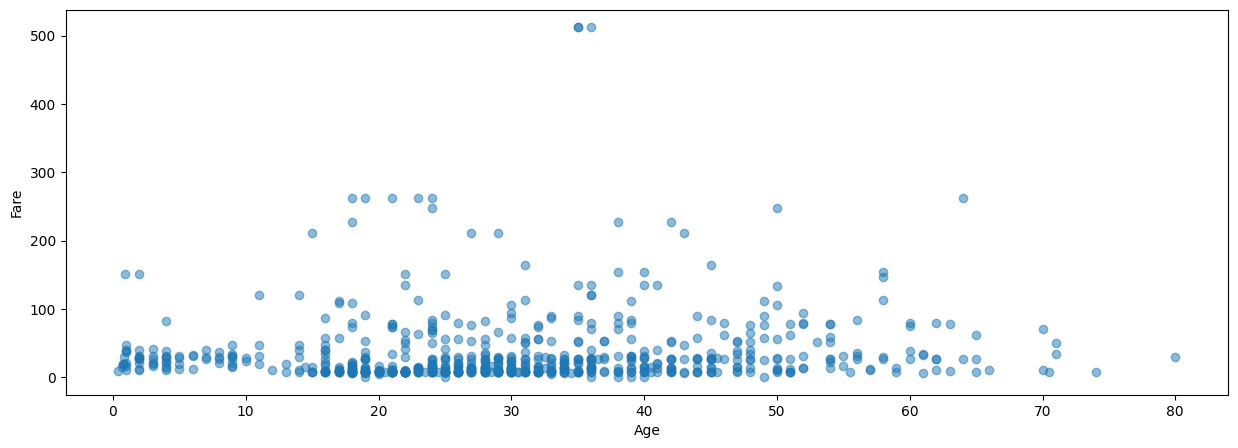

In [70]:
#Korelacja między opłatą, a wiekiem pasażerów
age_values = dataset.loc[dataset['Fare'].notnull(), 'Age'].values
plt.figure(figsize=(15, 5))
plt.scatter(x=age_values, y=fare_values, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()